# <h1 align="center">**Project 1 - Color Compression** </h1>

<h3 align="center"> Đặng Ngọc Tiến - 20127641</h3>

In [91]:
## Import library
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

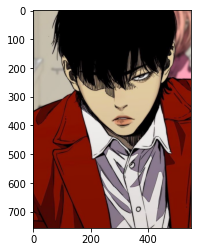

In [92]:
## Read file and display
raw_img = Image.open('te.jpg')

img = np.array(raw_img)
img_height, img_width = img.shape[0], img.shape[1]
img = img.reshape( img_height*img_width, img.shape[2])

plt.imshow(raw_img)

In [93]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    
    # Init in_pixels
    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters , replace = False)]
    # Init random
    elif init_centroids == 'random':
        centroids = np.random.randint(0,255,size=(k_clusters,img_1d.shape[1]))
    else:
        raise ValueError('init_centroids must be "random" or "in_pixels"')

    for i in range(max_iter):
        # distance between each pixel and centroids
        distance = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
        # Find the label of each pixel
        labels = np.argmin(distance , axis = 0)
        # Update centroids
        means = []
        for j in range(k_clusters):
            means.append(img_1d[labels == j].mean(axis = 0))
        means = np.array(means)
        for i in range(k_clusters):
          if len(means[i]) != 0:
            centroids[i] = means[i]
    
    return centroids, labels

## **Test program**
Hình ảnh kết quả với từng số lượng màu, `k = {3, 5, 7}`.

In [94]:
output_img = []
output_img.append(raw_img)

In [95]:
for k_cluster in [3,5,7]:
  ## Init in pixels test
  img_ptest = img.copy()
  centroids, labels = kmeans(img_ptest,k_cluster,10,'in_pixels')
  
  ## reassign label to the picture
  for k in range(centroids.shape[0]):
    img_ptest[labels == k] = centroids[k]
    
  img_ptest = img_ptest.astype("uint8")
  img_ptest = img_ptest.reshape(img_height, img_width  , 3)
  output_img.append(img_ptest.copy())

C:\Users\Admin\AppData\Local\Temp\ipykernel_16296\3601475421.py:46: RuntimeWarning: Mean of empty slice.
  means.append(img_1d[labels == j].mean(axis = 0))


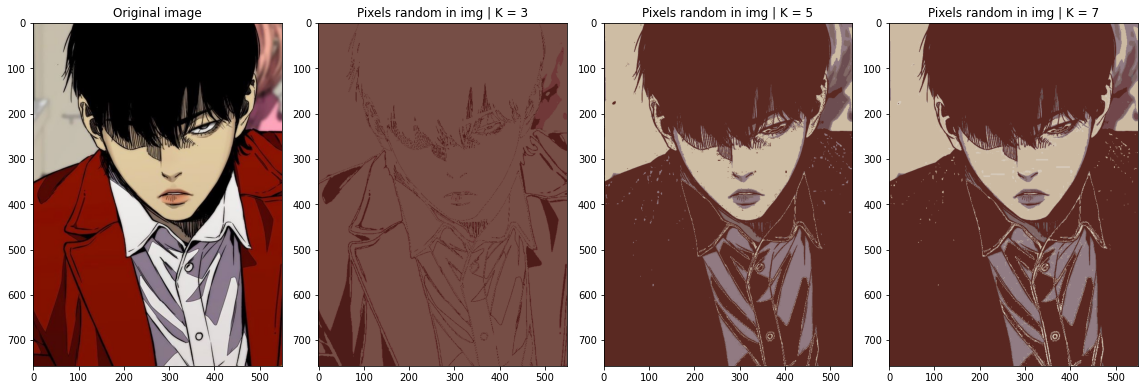

In [96]:
plot_iter = 1
demo, axis = plt.subplots(1, 4, figsize = (16, 12))
axis[0].imshow(output_img[0])
axis[0].set_title('Original image')
for i,k in [(1,3),(2,5),(3,7)]:
  axis[i].set_title(f'Pixels random in img | K = {k}')
  axis[i].imshow(output_img[plot_iter])
  plot_iter += 1
plt.tight_layout();

In [97]:
for k_cluster in [3,5,7]:
  ## Init random test
  img_rtest = img.copy()
  centroids, labels = kmeans(img_rtest,k_cluster,10,'random')

  ## reassign label to the picture
  for k in range(centroids.shape[0]):
      img_rtest[labels == k] = centroids[k]

  img_rtest = img_rtest.astype("uint8")
  img_rtest = img_rtest.reshape(img_height, img_width  , 3)
  output_img.append(img_rtest.copy())

C:\Users\Admin\AppData\Local\Temp\ipykernel_16296\3601475421.py:46: RuntimeWarning: Mean of empty slice.
  means.append(img_1d[labels == j].mean(axis = 0))


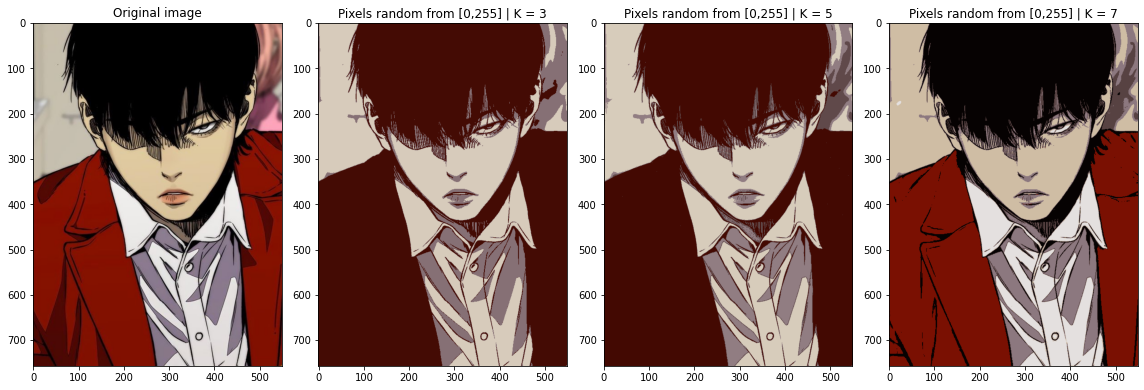

In [98]:
demo, axis = plt.subplots(1, 4, figsize = (16, 12))
axis[0].imshow(output_img[0])
axis[0].set_title('Original image')
for i,k in [(1,3),(2,5),(3,7)]:
  axis[i].set_title(f'Pixels random from [0,255] | K = {k}')
  axis[i].imshow(output_img[plot_iter])
  plot_iter += 1
plt.tight_layout();